---

# Keras Sequential Neural Network model to predict the probability of a phishing URL

---

### this notebook is of the final Keras model version that was decided on for this project
### included are two different ways to build the same Keras model, along with predictions and cross validation results

---

In [1]:
# if you haven't used tensorflow before, uncomment below to install:

# pip install tensorflow
# pip install keras

In [2]:
#load packages and libraries

import pandas as pd
import numpy as np
import sklearn as sk
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import *
from keras.utils.np_utils import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns


print("Done Loading")


C:\Users\jorda\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jorda\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jorda\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jorda\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Done Loading


Using TensorFlow backend.


## load data

In [3]:
full_df = pd.read_csv("https://raw.githubusercontent.com/jwaldroop/phishing-url-project/main/dataset_full.csv")

full_df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


---

# unit testing to remove negative values (there cannot be a negative url length, etc.)

---

In [4]:
# Noticed a discrepancy in the data, some values are recorded as -1 even though it makes not practical sense, i.e. you can't have a negative quantity of a character
# This changes all -1 to 0
full_df.dtypes == 'int64'

def remove_negatives(full_df):
    full_df[full_df == -1] = 0
remove_negatives(full_df)

In [5]:
# unit test 
is_it_working = []
def data_cleaning_unit_test(column):
    did_it_work =  {'Yes':0 , 'No':0}
    for i in column:
        if i >= 0:
            did_it_work['Yes'] += 1
        elif i <0:
            did_it_work['No'] += 1
    if did_it_work['No'] > 0:
        print(column.name,'=', 'Not working')
    else:
        print(column.name,'=', 'It worked!')

In [6]:
for col in full_df.columns.tolist():
    data_cleaning_unit_test(full_df[col])

qty_dot_url = It worked!
qty_hyphen_url = It worked!
qty_underline_url = It worked!
qty_slash_url = It worked!
qty_questionmark_url = It worked!
qty_equal_url = It worked!
qty_at_url = It worked!
qty_and_url = It worked!
qty_exclamation_url = It worked!
qty_space_url = It worked!
qty_tilde_url = It worked!
qty_comma_url = It worked!
qty_plus_url = It worked!
qty_asterisk_url = It worked!
qty_hashtag_url = It worked!
qty_dollar_url = It worked!
qty_percent_url = It worked!
qty_tld_url = It worked!
length_url = It worked!
qty_dot_domain = It worked!
qty_hyphen_domain = It worked!
qty_underline_domain = It worked!
qty_slash_domain = It worked!
qty_questionmark_domain = It worked!
qty_equal_domain = It worked!
qty_at_domain = It worked!
qty_and_domain = It worked!
qty_exclamation_domain = It worked!
qty_space_domain = It worked!
qty_tilde_domain = It worked!
qty_comma_domain = It worked!
qty_plus_domain = It worked!
qty_asterisk_domain = It worked!
qty_hashtag_domain = It worked!
qty_dolla

---

# Keras Sequential NN model on entire dataset

---

In [7]:
y = full_df.iloc[:,-1]

X = full_df.iloc[:,0:111]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=808)

train_X.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
5676,1,0,0,1,0,0,0,0,0,0,...,209,1,6,2,3011,1,0,0,0,0
39002,3,0,0,0,0,0,0,0,0,0,...,2625,4,4,2,247,1,1,0,0,0
1732,2,0,0,0,0,0,0,0,0,0,...,350,1,2,1,14399,0,0,0,0,0
39668,2,0,0,0,0,0,0,0,0,0,...,97,1,2,4,7199,0,1,0,0,0
82035,2,0,0,0,0,0,0,0,0,0,...,269,1,4,4,21598,0,0,0,0,0


In [8]:
tf.keras.backend.clear_session() #clear tensorflow backend to help with memory leakage

nn_mod_1 = keras.Sequential([
                          layers.InputLayer(input_shape=[111]),                   # first layer - input - number of columns in X
                          layers.Dense(units=64, activation='relu'),              # second layer - first dense layer - 64 output neurons w/ rectified linear unit activation
                          layers.BatchNormalization(),                            # third layer - first batch normalization
                          layers.Dropout(0.2),                                    # fourth layer - first dropout layer - drop 20% of neurons
                          layers.Dense(units=64, activation='relu'),              # fifth layer - second dense layer - 64 output neurons w/ ReLU activation
                          layers.BatchNormalization(),                            # sixth layer - second batch normalization
                          layers.Dropout(0.2),                                    # seventh layer - second dropout layer - drop 20% of neurons 
                          layers.Dense(units=50, activation='relu'),              # eighth layer -  third dense layer - 50 output neurons w/ ReLU activation
                          layers.BatchNormalization(),                            # ninth layer - third batch normalization
                          layers.Dropout(0.20),                                   # tenth layer - third dropout layer - drop 20% of neurons
                          layers.Dense(units=32, activation='relu'),              # eleventh layer - fourth dense layer - 32 output neurons w/ ReLU activation 
                          layers.BatchNormalization(),                            # twelfth layer - fourth batch normalization
                          layers.Dropout(0.2),                                    # thirteenth layer - fourth dropout layer - drop 20% of neurons
                          layers.Dense(units=32, activation='relu'),              # fourteenth layer - fifth dense layer - 32 output neurons w/ ReLU activation
                          layers.BatchNormalization(),                            # fifteenth layer - fifth batch normalization
                          layers.Dropout(0.2),                                    # sixteenth layer - fifth dropout layer - drop 20% of neurons
                          layers.Dense(units=16, activation='relu'),              # seventeenth layer - sixth dense layer - 16 output neurons w/ ReLU activation
                          layers.BatchNormalization(),                            # eighteenth layer - sixth batch normalization
                          layers.Dropout(0.40),                                   # nineteenth layer - sixth dropout layer - drop 40% of neurons
                          layers.Dense(units=16, activation='relu'),              # twentieth layer - seventh dense layer - 16 output neurons w/ ReLU activation
                          layers.BatchNormalization(),                            # twenty-first layer - seventh batch normalization
                          layers.Dropout(0.40),                                   # twenty-second layer - seventh dropout layer - drop 40% of neurons
                          layers.Dense(units=111, activation='relu'),             # twenty-third layer - eighth dense layer - 111 output neurons w/ ReLU activation
                          layers.BatchNormalization(),                            # twenty-fourth layer - eighth batch normalization
                          layers.Flatten(),                                       # twenty-fifth layer - flatten - adds column to X for predictions to fit
                          layers.Dense(units=1, activation='sigmoid')             # twenty-sixth layer - output layer - 1 output neuron w/ sigmoid activation (preds <> 0, 1)
])

nn_mod_1.compile(
    optimizer='adam', #best optimizer for noise, easy computation
    loss='binary_crossentropy', #crossentropy between preds and val_y; preds are between 0 & 1 so we use binary
    metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5), #binary accuracy between preds and val_y with 0.5 threshold
             tf.keras.metrics.AUC(), # measuring AUC (obviously) through internal measures of TP, TN, FP, FN
             ]
)

# early stopping callback will monitor the validation data's binary accuracy for it's maximum value
# & 25 epochs after reaching the maximum value, the model will stop running and restore the best layer weights measured.
# I don't actually want this to run for anywhere near 500 epochs but this gives it the flexibility to learn as long as needed

earlystopping = callbacks.EarlyStopping(monitor = 'val_binary_accuracy', mode = 'max',
                                       patience = 25, restore_best_weights = True)

# this will output a table of the layers, each layer output shape, and the parameters measured by the model
nn_mod_1.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                7168      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
__________________________________________

### this fit method:
 - does not use the original validation split (25%) during model fitting to allow for more accurate evaluation and preditions later on
 - the 75% training split (train_X, train_y) is split 70/30 during model fitting and each epoch the 70/30 split is, well, shuffled 
 - the epochs are set to 250 (250 iterations) but the early stopping callback should keep the epochs significantly less than that
 - the batch_size is how many rows are fed into the model at a time
 - there are 8 workers to *hopefully* help it run faster, in addition to the early stopping callback being applied

In [9]:
history1 = nn_mod_1.fit(train_X, train_y, validation_split=0.30, shuffle=True, batch_size=1500, epochs=250, callbacks = [earlystopping], workers=8, verbose=0)
# for a more detailed output, verbosity can be changed to verbose=1

In [10]:
#turn model fit metric measures into a pandas dataframe

history_df1 = pd.DataFrame(history1.history)

history_df1.describe()

,loss,binary_accuracy,auc,val_loss,val_binary_accuracy,val_auc
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.308920,0.862551,0.919491,0.307714,0.864109,0.936570
std,0.111323,0.075011,0.078953,0.130594,0.079758,0.074731
min,0.212944,0.537377,0.531332,0.191180,0.647398,0.475400
25%,0.235900,0.852296,0.918490,0.217855,0.859433,0.946735
50%,0.260073,0.895314,0.952994,0.249255,0.896546,0.967756
75%,0.344599,0.905902,0.961400,0.337138,0.917214,0.973163
max,0.733289,0.917682,0.968222,0.737526,0.931014,0.977057


## evaluating the model and getting the overall model metrics following model fitting

In [11]:
#tf.keras function to evaluate the model & record best metrics

train_acc = nn_mod_1.evaluate(train_X, train_y)  # evaluation w/ best measures of training data -- aka model fit
test_acc = nn_mod_1.evaluate(val_X, val_y)       # evaluation w/ best measures of validation/testing data -- the model hasn't seen this data before so super important!

22162/22162 [==============================] - 3s 143us/sample - loss: 0.1965 - binary_accuracy: 0.9296 - auc: 0.9766


In [12]:
# display validation/testing evaluation metrics in a different way

dict(zip(nn_mod_1.metrics_names, test_acc))

{'loss': 0.19652771030228852, 'binary_accuracy': 0.9295641, 'auc': 0.9766177}

### graphs of the training vs. validation metrics across model fitting

Minimum validation loss (binary_crossentropy): 0.1911802718539684


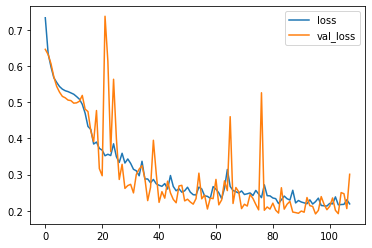

In [13]:
history_df1.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss (binary_crossentropy): {}".format(history_df1['val_loss'].min()))

Maximum AUC: 0.977056622505188


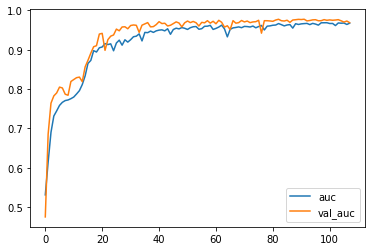

In [14]:
history_df1.loc[:, ['auc', 'val_auc']].plot();
print("Maximum AUC: {}".format(history_df1['val_auc'].max()))

Maximum validation binary accuracy: 0.9310137629508972


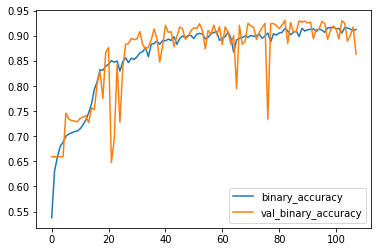

In [15]:
history_df1.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();
print("Maximum validation binary accuracy: {}".format(history_df1['val_binary_accuracy'].max()))

## making probablistic predictions

In [16]:
preds = nn_mod_1.predict(val_X) # this is tf.keras function & could be called on the entire dataset but it's not fair to ask the model to predict on data already seen
preds

array([[0.9187473 ],
       [0.00912759],
       [0.5828626 ],
       ...,
       [0.04503793],
       [0.01115325],
       [0.914149  ]], dtype=float32)

## making binary predictions

In [17]:
preds1 = (nn_mod_1.predict(val_X) > 0.5).astype('int32') # this is tf.keras function & could be called on the entire dataset but it's not fair to ask the model to predict on data already seen
preds1

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [18]:
#confusion matrix of the predictions & the actual values
cm1 = confusion_matrix(val_y, preds1)
print(cm1)

[[13432  1087]
 [  474  7169]]


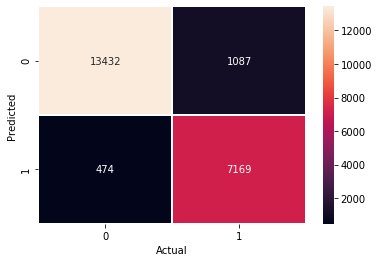

In [19]:
sns.heatmap(cm1, annot=True, fmt='d', linewidths=0.5, xticklabels=True, yticklabels=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [20]:
acc1 = accuracy_score(val_y, preds1)
f1s1 = f1_score(val_y, preds1)
precis1 = precision_score(val_y, preds1, average='binary')
rec1 = recall_score(val_y, preds1, average='binary')

print('The accuracy score for the model is:', acc1)
print('The F1 score for the model is:', f1s1)
print('The precision-recall score is: {0:0.2f}'.format(precis1))
print('The recall score is: %.3f' % rec1)

The accuracy score for the model is: 0.9295641187618446
The F1 score for the model is: 0.9018177243851815
The precision-recall score is: 0.87
The recall score is: 0.938


---
# NN in a more deployable format

## this is the model format to be used in the .py file for deployment

### this format also allows for cross-validation to validate the model's integrity/results
 - the cross-validation is the most time consuming portion of the notebook, fyi

---

In [21]:
tf.keras.backend.clear_session()

earlystopping = callbacks.EarlyStopping(monitor = 'val_acc', mode = 'max', #this needs to be changed to 'val_accuracy' if running in a colab notebook (for some reason jupyter is different)
                                         patience = 25, restore_best_weights = True)

# building the model as a callable function for easier use with the sklearn wrapper

def phish_nn():
  model = keras.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=[111]))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=50, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.20))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=16, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.40))
  model.add(tf.keras.layers.Dense(units=16, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.40))
  model.add(tf.keras.layers.Dense(units=111, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #had to slightly alter these parameters per the limitations on metric measuring in the sklearn wrapper
  model.fit(train_X, train_y, validation_split=0.30, batch_size= 1500, epochs=250, callbacks = [earlystopping], workers=8, verbose=0)
  (model.predict(val_X) > 0.5).astype("int32") #give the model the ability to predict as above
  model.evaluate(val_X, val_y) #give the model the ability to evaluate like was done above
  return model

In [22]:
mod = KerasClassifier(build_fn=phish_nn,
                        epochs=15,
                        batch_size=1500, verbose=0)

num_folds=5
kfold=StratifiedKFold(n_splits=num_folds, shuffle=True)

In [23]:
cv_results=cross_val_score(mod,
                           X, y,
                           cv=kfold, verbose=0
                           )

22162/22162 [==============================] - 3s 139us/sample - loss: 0.1886 - acc: 0.9292


In [31]:
print('The average cross-validation accuracy is: ', round(cv_results.mean(), 4))

The average cross-validation accuracy is:  0.9249


In [32]:
print('The standard deviation for the cross-validation accuracy measure is: ', round(cv_results.std(), 4))

The standard deviation for the cross-validation accuracy measure is:  0.008


In [26]:
print('The five cross-validation accuracy results are: \n', cv_results)

The five cross-validation accuracy results are: 
 [0.93226171 0.92622674 0.91133171 0.92148459 0.93321675]


In [27]:
# making predictions based on a five fold cross-validation
cv_preds = cross_val_predict(mod, X, y, cv=num_folds, verbose=0)
cv_preds

22162/22162 [==============================] - 4s 161us/sample - loss: 0.2036 - acc: 0.9245


array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [28]:
#confusion matrix of the cross validation results & the actual values
cm = confusion_matrix(y, cv_preds)
print(cm)

[[53947  4053]
 [ 2497 28150]]


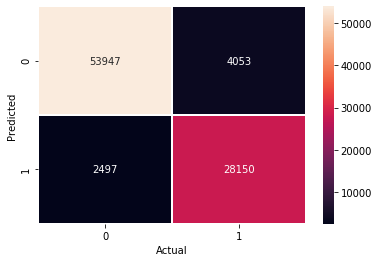

In [29]:
sns.heatmap(cm, annot=True, fmt='d', linewidths=0.5, xticklabels=True, yticklabels=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [30]:
acc = accuracy_score(y, cv_preds)
f1s = f1_score(y, cv_preds)
precis = precision_score(y, cv_preds, average='binary')
rec = recall_score(y, cv_preds, average='binary')

print('The accuracy score for the model is: \n', acc)
print('The F1 score for the model is: \n', f1s)
print('The precision-recall score is: {0:0.2f}'.format(precis))
print('The recall score is: %.3f' % rec)

The accuracy score for the model is: 
 0.9261114307308764
The F1 score for the model is: 
 0.8957836117740652
The precision-recall score is: 0.87
The recall score is: 0.919
